In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(2061, 32)
(2061, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL is swinging
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 21] == 1)[0]
X_relative_footsteps_continuous_absolute_FL_swinging = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_FL_swinging = Y_relative_footsteps_continuous_absolute[idxs]

In [8]:
print("Percentage of footstep where FL and RR are swinging: ", len(idxs)/len(X_relative_footsteps_continuous_absolute) * 100)

Percentage of footstep where FL and RR are swinging:  50.41242115477923


## Predict FL foot -> x

### Linear Regression

In [10]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FL_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FL_swinging[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_x = LinearRegression()

# Fit the model
model_fl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9978767216600637
RMSE:  0.0019253290490993428
The lowest error is:  5.44775870289782e-07
The highest error is:  0.01818255412349805
The avg. error is:  0.0008312847019438507


In [11]:
model_fl_relative_support_x.coef_

array([[ 2.04830454e-01, -2.22044605e-16,  5.55111512e-16,
        -7.28324811e-01, -1.53290432e-01,  3.26516955e-01,
        -9.43370354e-01, -1.25366139e-01,  8.23464419e-02,
         2.82197794e-01,  1.21739715e-01]])

In [12]:
model_fl_relative_support_x.intercept_

array([0.00083732])

Text(0, 0.5, 'Predictions')

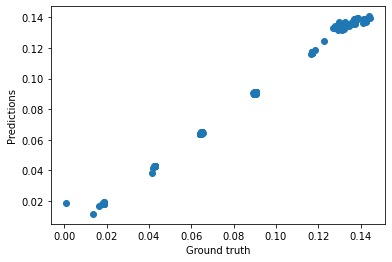

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#%store model_fl_relative_support_x

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [16]:
# Save model
#joblib.dump(model_fl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_x.sav")

### Predict FL foot -> y

In [17]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_FL_swinging[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_FL_swinging[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_FL_swinging[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_fl_relative_support_y = LinearRegression()

# Fit the model
model_fl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  -0.24932693620024393
RMSE:  0.0011807381887203132
The lowest error is:  1.3570745246452298e-05
The highest error is:  0.012012196969136343
The avg. error is:  0.0004568017792283661


In [18]:
model_fl_relative_support_y.coef_

array([[ 3.28478910e-02,  5.55111512e-17, -3.33066907e-16,
         1.20643635e-01, -2.39918594e-01, -7.20303585e-02,
        -9.36746058e-02, -1.57874675e-01,  2.17029908e-01,
         1.53171861e-01,  2.22463204e-01]])

In [19]:
model_fl_relative_support_y.intercept_

array([0.01165547])

Text(0, 0.5, 'Predictions')

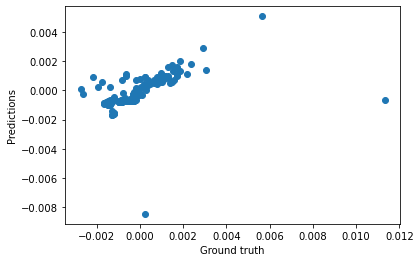

In [20]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_fl_relative_support_y

In [22]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [23]:
# Save model
#joblib.dump(model_fl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fl_relative_support_y.sav")